In [10]:
# parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

# activation functions 
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / expZ.sum(axis=0, keepdims=True)


# more functions for testing accuracy and making predictions
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


# forward and backward propagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


# finally, using gradient descent for training the model
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
w1, b1, w2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)


Iteration:  0
[8 8 4 ... 4 4 4] [2 4 1 ... 3 2 5]
0.09519512195121951
Iteration:  10
[8 8 1 ... 6 3 6] [2 4 1 ... 3 2 5]
0.3015853658536585
Iteration:  20
[8 8 1 ... 6 8 6] [2 4 1 ... 3 2 5]
0.42609756097560975
Iteration:  30
[2 8 1 ... 0 8 6] [2 4 1 ... 3 2 5]
0.5027317073170732
Iteration:  40
[2 4 1 ... 0 9 6] [2 4 1 ... 3 2 5]
0.5582439024390244
Iteration:  50
[2 4 1 ... 0 9 6] [2 4 1 ... 3 2 5]
0.6005609756097561
Iteration:  60
[2 4 1 ... 2 9 5] [2 4 1 ... 3 2 5]
0.6313170731707317
Iteration:  70
[2 4 1 ... 2 9 5] [2 4 1 ... 3 2 5]
0.6581707317073171
Iteration:  80
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.6789268292682927
Iteration:  90
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.6970487804878048
Iteration:  100
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.7105365853658536
Iteration:  110
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.7234146341463414
Iteration:  120
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.7343658536585366
Iteration:  130
[2 4 1 ... 2 9 3] [2 4 1 ... 3 2 5]
0.7448536585365854
Iteration:  140

Prediction:  [2]
Label:  2


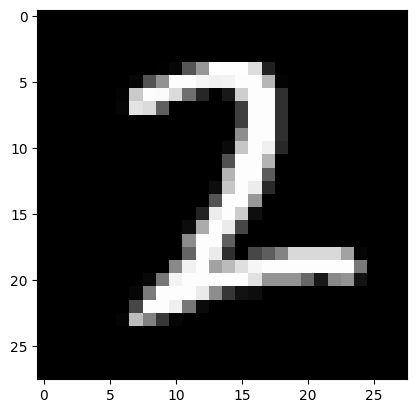

Prediction:  [5]
Label:  5


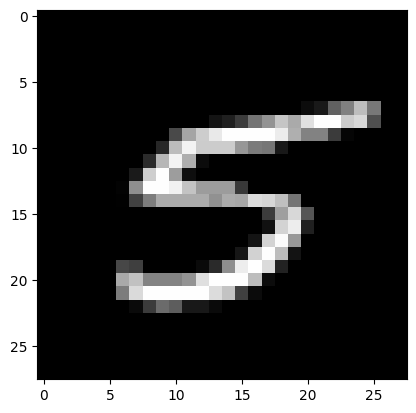

Prediction:  [5]
Label:  5


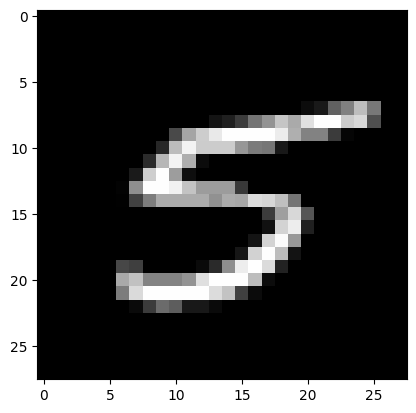

Prediction:  [8]
Label:  8


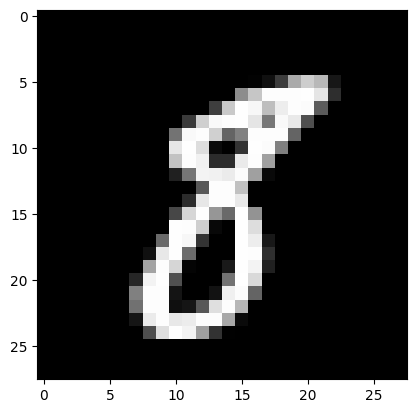

In [12]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(5, w1, b1, w2, b2)
test_prediction(5, w1, b1, w2, b2)
test_prediction(6, w1, b1, w2, b2)